<a href="https://colab.research.google.com/github/cmachiucla/COMM158_final_Machi_Wiesner/blob/main/COMM158_final_Machi_Wiesner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###########################
### Dataset Description ###
###########################
# This dataset contains Twitter posts from the time of the Donald Trump vs. Hillary Clinton election.
# Tweets related to each candidate are stored in separate CSV files.
# Each CSV file includes the following information:
## Timestamp (created_at) – The date and time when the tweet was posted.
## Likes (favorite_count) – The number of likes the tweet received.
## Retweets (retweet_count) – The number of times the tweet was shared.
## Content (text) – The text of the tweet.


In [3]:
#########################################
### Part 1: Guided Data Exploration   ###
#########################################

# 1.1 Merging CSV Files
# Load the two CSV files from the data folder into a single Pandas DataFrame.
# Make sure to add a new column to keep track of the candidate name associated with each tweet.

import pandas as pd

df_trump = pd.read_csv("trump_encoded.csv")
df_clinton = pd.read_csv("clinton_encoded.csv")

df_trump["candidate"] = "Trump"
df_clinton["candidate"] = "Clinton"

df_combined = pd.concat([df_trump, df_clinton], ignore_index=True)

df_combined.head()

df_combined.to_csv("merged_tweets.csv", index=False)

from google.colab import files
files.download("merged_tweets.csv")

import os
import matplotlib.pyplot as plt
import numpy as np


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# 1.2 Sentiment Analysis
# We will use the NRC Emotion Lexicon, a lexicon that categorizes words based on emotions and sentiment.

# About the NRC Emotion Lexicon:
# Download the NRC Emotion Lexicon from: https://github.com/aditeyabaral/lok-sabha-election-twitter-analysis/blob/master/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt
# This lexicon provides 10 sentiments:
## Eight emotions: Anger, anticipation, disgust, fear, joy, sadness, surprise, and trust.
## Two valences: Positive and negative.
# The file has three columns: word, emotion, and association (binary: 1 = associated, 0 = not associated).

!wget -O NRC-Emotion-Lexicon.txt https://github.com/aditeyabaral/lok-sabha-election-twitter-analysis/raw/master/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt

import pandas as pd

nrc_lexicon = pd.read_csv("NRC-Emotion-Lexicon.txt", sep="\t", header=None, names=["word", "emotion", "association"])
nrc_lexicon = nrc_lexicon[nrc_lexicon["association"] == 1].drop(columns=["association"])

print(nrc_lexicon.head())

emotion_dict = nrc_lexicon.groupby("word")["emotion"].apply(list).to_dict()

print("Example word lookup:", emotion_dict.get("happy", []))  # Should return associated emotions


--2025-03-22 06:53:10--  https://github.com/aditeyabaral/lok-sabha-election-twitter-analysis/raw/master/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aditeyabaral/lok-sabha-election-twitter-analysis/master/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt [following]
--2025-03-22 06:53:11--  https://raw.githubusercontent.com/aditeyabaral/lok-sabha-election-twitter-analysis/master/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2579145 (2.5M) [text/plain]
Saving to: ‘NRC-Emotion-Lexicon.txt’

NRC-Emotion-Lexicon 100%[========

In [5]:
# 1.2.1 Create a Sentiment Analysis Function:
## The input of the function should be the text of one tweet.
## The output should be a count of each of the 10 sentiment categories.

import nltk
from nltk.tokenize import word_tokenize
from collections import defaultdict

nltk.download('punkt_tab')

nltk.download('punkt')

sentiment_categories = ['anger', 'anticipation', 'disgust', 'fear', 'joy',
                        'sadness', 'surprise', 'trust', 'positive', 'negative']

def analyze_sentiment(tweet):
    """
    Analyzes a tweet's sentiment using the NRC Emotion Lexicon.

    Parameters:
        tweet (str): The text of a tweet.

    Returns:
        dict: A dictionary containing counts of each sentiment category.
    """
    words = word_tokenize(tweet.lower())
    emotion_counts = defaultdict(int)

    for word in words:
        if word in emotion_dict:
            for emotion in emotion_dict[word]:
                emotion_counts[emotion] += 1

    return {sentiment: emotion_counts.get(sentiment, 0) for sentiment in sentiment_categories}

sample_tweet = "I am so happy and excited for the future! But also a bit nervous."

sentiment_result = analyze_sentiment(sample_tweet)

print("Sentiment Analysis Result:", sentiment_result)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Sentiment Analysis Result: {'anger': 0, 'anticipation': 3, 'disgust': 0, 'fear': 1, 'joy': 2, 'sadness': 0, 'surprise': 1, 'trust': 2, 'positive': 2, 'negative': 1}


In [6]:
# 1.2.2 Apply the self-defined function to the text column of the merged data frame from #1.1.
## The output should be the original merged DataFrame with 10 additional columns,
## one for each sentiment, containing the count of that sentiment in the tweet.
# Install the ace_tools package using pip if it's not already installed.

import nltk
from nltk.tokenize import word_tokenize
from collections import defaultdict
import pandas as pd

nltk.download('punkt')

sentiment_categories = ['anger', 'anticipation', 'disgust', 'fear', 'joy',
                        'sadness', 'surprise', 'trust', 'positive', 'negative']

nrc_lexicon = pd.read_csv("NRC-Emotion-Lexicon.txt", sep="\t", header=None, names=["word", "emotion", "association"])
nrc_lexicon = nrc_lexicon[nrc_lexicon["association"] == 1].drop(columns=["association"])

emotion_dict = nrc_lexicon.groupby("word")["emotion"].apply(list).to_dict()

def analyze_sentiment(tweet):
    words = word_tokenize(tweet.lower())
    emotion_counts = defaultdict(int)

    for word in words:
        if word in emotion_dict:
            for emotion in emotion_dict[word]:
                emotion_counts[emotion] += 1

    return {sentiment: emotion_counts.get(sentiment, 0) for sentiment in sentiment_categories}

df_combined["sentiment_counts"] = df_combined["text"].apply(analyze_sentiment)

sentiment_df = df_combined["sentiment_counts"].apply(pd.Series)

df_combined = pd.concat([df_combined.drop(columns=["sentiment_counts"]), sentiment_df], axis=1)

print(df_combined.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


      created_at  favorite_count  retweet_count  \
0  11/7/15 00:07            1824            796   
1  11/7/15 00:08            2285           4029   
2  11/7/15 03:23            2333            986   
3  11/7/15 05:20            3012           1215   
4  11/7/15 05:23            1892            703   

                                                text candidate  anger  \
0  Would be nice if @jmartNYT learned how to read...     Trump      0   
1  "@nbcsnl: One more day! Donald Trump hosts #SN...     Trump      0   
2  "@Bubbachitchat1: THIS IS WHY THE POLLS ARE WR...     Trump      0   
3  One of the dumbest political pundits on televi...     Trump      0   
4  "@essygalloway: @realDonaldTrump @nbcsnl @Sia ...     Trump      0   

   anticipation  disgust  fear  joy  sadness  surprise  trust  positive  \
0             1        0     0    1        0         1      1         1   
1             1        0     0    0        0         2      0         0   
2             0        0     

In [7]:
# 1.3 Hierarchical Indexing & Summary Statistics
# 1.3.1 Group by candidate and generate summary statistics (describe()) for each emotion category.

emotion_summary_by_candidate = df_combined.groupby('candidate')[sentiment_categories].describe()

print(emotion_summary_by_candidate)

# 1.3.2 Group by candidate and each emotion category, then compute summary statistics for favorite and retweets.

engagement_summary = df_combined.groupby(['candidate'] + sentiment_categories)[['favorite_count', 'retweet_count']].describe()

print(engagement_summary)


            anger                                              anticipation  \
            count      mean       std  min  25%  50%  75%  max        count   
candidate                                                                     
Clinton    4711.0  0.361494  0.682100  0.0  0.0  0.0  1.0  4.0       4711.0   
Trump      4794.0  0.332290  0.632202  0.0  0.0  0.0  1.0  4.0       4794.0   

                     ... positive      negative                                \
               mean  ...      75%  max    count      mean       std  min  25%   
candidate            ...                                                        
Clinton    0.495648  ...      2.0  7.0   4711.0  0.590745  0.874619  0.0  0.0   
Trump      0.410305  ...      1.0  7.0   4794.0  0.614518  0.925295  0.0  0.0   

                          
           50%  75%  max  
candidate                 
Clinton    0.0  1.0  7.0  
Trump      0.0  1.0  6.0  

[2 rows x 80 columns]
                                        

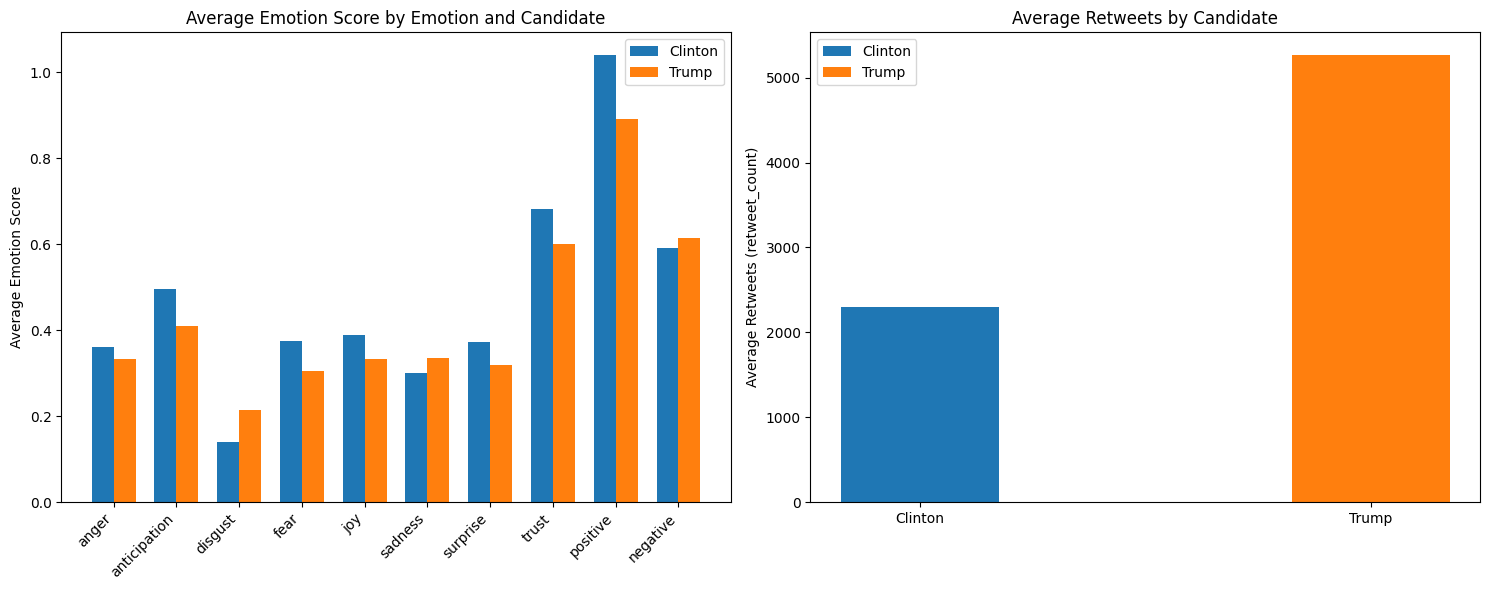

Average Emotion Score by Emotion and Candidate.png in /content/output


In [15]:
# 1.4 Visualizing Results
# Create one graph with 2 sub figures (i.e. 1 row 2 columns).
# For both figures, emotion categories should be the x-axis, and candidate names as the legend.
# The first subplot should have likes (favorite_count) as y-axis, and the second subplot should have retweets (retweet_count) as y-axis.
import matplotlib.pyplot as plt
import numpy as np


grouped_data = df_combined.groupby(['candidate'])[sentiment_categories].mean().reset_index()

sentiment_categories = grouped_data.columns[1:]
candidates = grouped_data['candidate'].unique()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Likes (favorite_count)
width = 0.35
x = np.arange(len(sentiment_categories))

for i, candidate in enumerate(candidates):
    candidate_data = grouped_data[grouped_data['candidate'] == candidate]
    axes[0].bar(x + i * width, candidate_data[sentiment_categories].values[0], width, label=candidate)

axes[0].set_ylabel('Average Emotion Score')
axes[0].set_title('Average Emotion Score by Emotion and Candidate')
axes[0].set_xticks(x + width / 2)
axes[0].set_xticklabels(sentiment_categories, rotation=45, ha='right')
axes[0].legend()

# Subplot 2: Retweets (retweet_count)
retweet_data = df_combined.groupby('candidate')['retweet_count'].mean().reset_index()

for i, candidate in enumerate(retweet_data['candidate']):
    axes[1].bar(i, retweet_data.loc[retweet_data['candidate'] == candidate, 'retweet_count'].values[0], width, label=candidate)

axes[1].set_ylabel('Average Retweets (retweet_count)')
axes[1].set_title('Average Retweets by Candidate')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(retweet_data['candidate'])
axes[1].legend()


plt.tight_layout()
plt.show()
plt.title("Average Emotion Score by Emotion and Candidate")

output_folder = "/content/output"
os.makedirs(output_folder, exist_ok=True)

plt.savefig(os.path.join(output_folder, "Average Emotion Score by Emotion and Candidate.png"))
plt.close()

print(f"Average Emotion Score by Emotion and Candidate.png in {output_folder}")

              favorite_count  retweet_count
anger               0.048313       0.034791
anticipation       -0.022425      -0.022149
disgust             0.076378       0.051278
fear                0.046852       0.034378
joy                -0.014365      -0.023417
sadness             0.045024       0.029722
surprise           -0.032741      -0.019067
trust               0.012400       0.004647
positive           -0.015999      -0.025057
negative            0.056262       0.040547


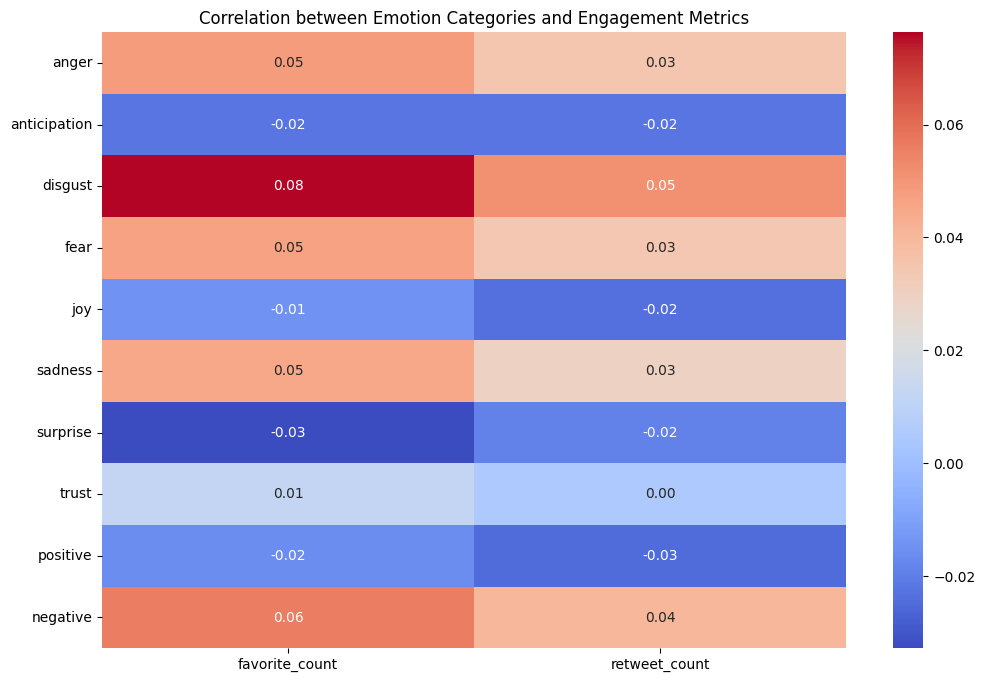

Correlation between Emotion Categories and Engagement Metrics.png in /content/output


In [19]:
####################################
### Part 2: Correlation Analysis ###
####################################
# 2.1 Research Question: Is there a relationship between emotion categories and the number of retweets or favorites?
# Conduct correlation analysis between emotion counts and likes/retweets.
# To report your results, include a plot and a paragraph.
# For the paragraph writeup, feel free to write them as comments next to your code or plot.

all_columns = sentiment_categories.tolist() + ['favorite_count', 'retweet_count']
# Calculating correlations using the combined list of columns
correlations = df_combined[all_columns].corr()


all_columns = sentiment_categories.tolist()
all_columns.extend(['favorite_count', 'retweet_count'])

engagement_correlations = correlations[['favorite_count', 'retweet_count']].loc[sentiment_categories]

print(engagement_correlations)

plt.figure(figsize=(12, 8))
sns.heatmap(engagement_correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Emotion Categories and Engagement Metrics')
plt.show()


output_folder = "/content/output"
os.makedirs(output_folder, exist_ok=True)

plt.savefig(os.path.join(output_folder, "Correlation between Emotion Categories and Engagement Metrics.png"))
plt.close()

print(f"Correlation between Emotion Categories and Engagement Metrics.png in {output_folder}")


# Interpretation of Results for Part 2:

This heatmap shows the correlation coefficients between emotion categories and engagement metrics (favorites and retweets).

For positive correlations (the red areas greater than 0), they indicate that as the emotion score increases, the engagement metric tends to increase as well.This is especially evident with emotions like anger, disgust, fear, sadness, and negativity, where all of these values are greater than 0.02 for both retweets and likes. This could suggest that negative or pessimistic messaging spreads more quickly online, and can be powerful for getting a platform across.

For negative (the blue areas less than 0), they indicate that as the emotion score increases, the engagement metric tends to decrease. This is apparent with tweets that express surprise, joy, positivity, and anticipation, where each value is less than -0.01, except for joyful tweets that are liked. This data shows that uplifting tweets probably lead to less engagement overall for both candidates, so they may not be very effective when communicating their campaigns or discussing important political issues.

For neutral correlations (lighter or white colors close to 0), they suggest a weak relationship between the emotion and engagement metric. For this data set, there really only is one category with a neutral relationship: trust. This may mean that Americans don't care about how much someone trusts the political system, because even if these candidates tweet about how they trust the government or express trust in something, it typically equalizes with neither or large margin of engagement or a large margin of avoidance.


So, although no strong positive or negative correlations are observed, we can note some relevant relationships.For example, negative emotions show small and positive correlations with engagement, while positive emotions show weak and negative engagement.Disgust shows the highest correlation with favorites (0.08) and retweets (0.05). This suggests that negative tweets may receive more engagement. This data suggests that there may be a relationship between emotions expressed in tweets and how often people engage with the content, more research needs to be conducted and there may be other moderating factors at play (like algorithms and herd mentality), that could impact engagement beyond the tweets themselves.

It is important to also note that correlation does not imply causation. While we can observe relationships between emotions and engagement, further analysis would be needed to determine if one causes the other.


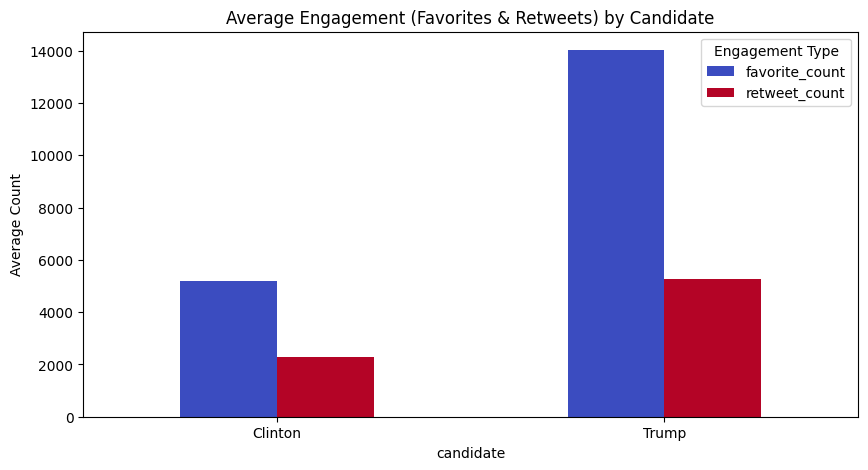

Average Engagement (Favorites & Retweets) by Candidate.png in /content/output


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


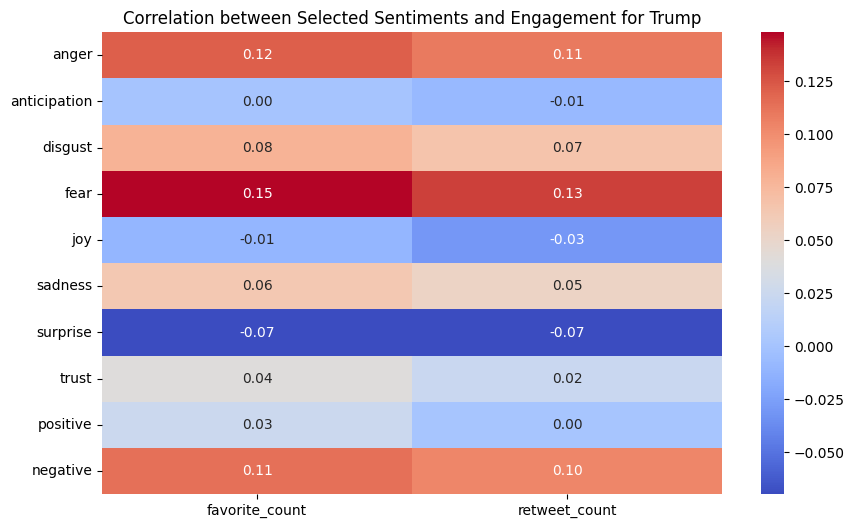

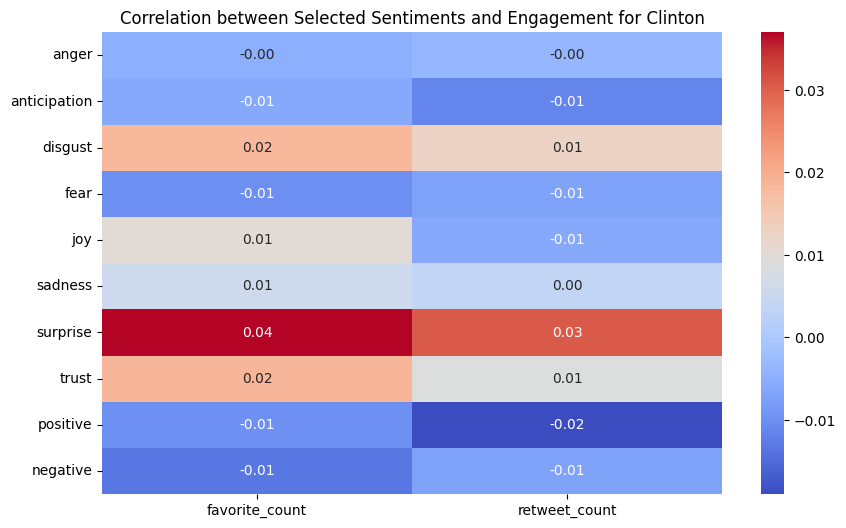

Correlation between Selected Sentiments and Engagement for Trump.png in /content/output
Correlation between Selected Sentiments and Engagement for Clinton.png in /content/output


In [22]:
#######################################
### Part 3: Open Ended Explorations ###
#######################################

# Explore this dataset: What interesting patterns and insights do you see? What notable trends or relationships can you identify?
# Focus on formulating and testing hypotheses, rather than confirming or disproving them.

# Notes on grading criteria:
## Whether a hypothesis is confirmed or not is not the focus.
## Rather, ensure that your hypothesis is well-formed and that your code can legitimately test it.
## Results should be accurate—whether they are surprising or not does not impact grading.

# Since this is a group project with 2 or 3 members, the final report should contain 2 or 3 sets of explorations depending on the group size.
# Each member should be responsible for 1 set of exploration.
# Each set of exploration should contain:
## A brief summary paragraph of your exploration (research question, analysis method used, interpretation of results/plots)
## The code you write for this exploration
## Visualizing the results (at least 1 plot)

# For example, one big question you can ask is that:
# Can this Twitter dataset provide any indication that predicts the outcome of the election?


# To emphasize the importance of collaboration:
# At least two of exploration sets must build upon one another.
# This could mean extending previous findings, refining an analysis method, adding deeper insight to an initial result, etc.
# In your submission, include a few sentences explaining how analyses build upon one another.

## RESEARCH QUESTION: Does engagement and negative content lead to higher success rate in the election?

#exploration 1: Do Trump's Tweets Get More Engagement Than Clinton?
#hypothesis 1: Trump's tweets get more engagement because they are negative.

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("merged_tweets.csv")

candidate_engagement = df.groupby("candidate")[["favorite_count", "retweet_count"]].mean()

candidate_engagement.plot(kind="bar", figsize=(10,5), colormap="coolwarm")
plt.title("Average Engagement (Favorites & Retweets) by Candidate")
plt.ylabel("Average Count")
plt.xticks(rotation=0)
plt.legend(title="Engagement Type")
plt.show()


output_folder = "/content/output"
os.makedirs(output_folder, exist_ok=True)

plt.savefig(os.path.join(output_folder, "Average Engagement (Favorites & Retweets) by Candidate.png"))
plt.close()

print(f"Average Engagement (Favorites & Retweets) by Candidate.png in {output_folder}")

# exploration 2: Out of the emotions studied, is there a correlation between specific emotions and engagement for each candidate?
# hypothesis 2: Trump will be more likely to have correlations for negative emotions, and Clinton will be more likely to
# be more neutral, with slight correlations for all.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from collections import defaultdict

nltk.download('punkt')

sentiment_categories = ['anger', 'anticipation', 'disgust', 'fear', 'joy',
                        'sadness', 'surprise', 'trust', 'positive', 'negative']

nrc_lexicon = pd.read_csv("NRC-Emotion-Lexicon.txt", sep="\t", header=None, names=["word", "emotion", "association"])
nrc_lexicon = nrc_lexicon[nrc_lexicon["association"] == 1].drop(columns=["association"])

emotion_dict = nrc_lexicon.groupby("word")["emotion"].apply(list).to_dict()

def analyze_sentiment(tweet):
    words = word_tokenize(tweet.lower())
    emotion_counts = defaultdict(int)

    for word in words:
        if word in emotion_dict:
            for emotion in emotion_dict[word]:
                emotion_counts[emotion] += 1

    return {sentiment: emotion_counts.get(sentiment, 0) for sentiment in sentiment_categories}


df = pd.read_csv("merged_tweets.csv")

df["sentiment_counts"] = df["text"].apply(analyze_sentiment)
sentiment_df = df["sentiment_counts"].apply(pd.Series)
df = pd.concat([df.drop(columns=["sentiment_counts"]), sentiment_df], axis=1)


def create_heatmap(candidate_data, candidate_name):
    correlation = candidate_data[sentiment_categories + ['favorite_count', 'retweet_count']].corr()

    engagement_correlations = correlation[['favorite_count', 'retweet_count']].loc[sentiment_categories]

    plt.figure(figsize=(10, 6))
    sns.heatmap(engagement_correlations, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation between Selected Sentiments and Engagement for {candidate_name}")
    plt.show()

trump_tweets = df[df["candidate"] == "Trump"]
create_heatmap(trump_tweets, "Trump")

clinton_tweets = df[df["candidate"] == "Clinton"]
create_heatmap(clinton_tweets, "Clinton")


output_folder = "/content/output"
os.makedirs(output_folder, exist_ok=True)

plt.savefig(os.path.join(output_folder, "Correlation between Selected Sentiments and Engagement for {candidate_name}.png"))
plt.close()

print(f"Correlation between Selected Sentiments and Engagement for Trump.png in {output_folder}")
print(f"Correlation between Selected Sentiments and Engagement for Clinton.png in {output_folder}")



#Exploration 1: Do Tweets About Trump Get More Engagement Than Clinton?
#Hypothesis 1: Trump's tweets get more engagement because they are negative.
Interpretation of results: The bar chart shoes that Trump receives significantly more favorites and retweets than Clinton. Trump has about 9,000 or 64% more likes and 3,000 or 60% more retweets, equating to an average of 62% more engagment. This suggests that Trump's content generates more engagement on Twitter. Further analysis shows that negative emotions dominate Trump-related tweets, it could indicate that controversial or provocative content drives engagement more than neutral or positive content.

# Exploration 2: Out of the emotions studied, is there a correlation between specific emotions and engagement for each candidate?

# Hypothesis 2: Trump will be more likely to have correlations for negative emotions, and Clinton will be more likely to be more neutral, with slight correlations for all.

Interpretation of results: These heatmaps show that Clinton's tweets across all of the subject studied, tend to have around the same level of retweets and likes, except for tweets that express surpise tend to get more engagement (around a 0.04 correlation coefficient for likes and 0.03 for retweets) and positive tweets tend to be retweeted more (with a correlation coefficient of 0.02). However, for Trump, the tweets with the highest correlation coefficients (fear, disgust, anger, and negative) have really high positive correlation coefficients between 0.10 and 0.15). This means that not only are these tweets most likely to be retweeted and liked more than any other type of tweet, but just one of these values is higher than an entire category for Clinton. For example, the correlation coefficient for liked tweets expressing fear for Trump is 0.15, whereas for Clinton it is -0.02. So, not only are these tweets not likely to garner engagement for Clinton, they are overwhelmingly likely to garner lots of engagement from online audiences for Trump. Combined with the exponential increase in online engagement from Trump's tweets (as seen in exploration 1), if these tweets become more popular, people will become more cognizant of Trump's campaign, and may be more likely to vote for him in an election if they are moderate and do not know who to vote for.

So, this data suggests that more negative content may lead to a slight increase in election success based on these explorations, but more research needs to be completed to further explore this issue.